In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import QuantileTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter
import os

In [2]:
sns.set(style='whitegrid', palette='muted', font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
file_path = r"C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\4-oy\6-project\binance.com\data\multi_class_JUP_engineered_features\multi_class_JUP_engineered_features.csv"
df = pd.read_csv(file_path, index_col='Datetime', parse_dates=True)


In [4]:
df.head()

,JUP_Open,JUP_High,JUP_Low,JUP_Close,JUP_Volume,JUP_Target_MultiClass,FE_JUP_Return_Log,FE_JUP_Volatility_5,FE_JUP_Volatility_20,FE_JUP_SMA_10,FE_JUP_SMA_50,FE_JUP_Close_vs_SMA10,FE_JUP_RSI_14,FE_JUP_Close_Lag1,FE_JUP_Volume_Lag1,FE_JUP_Hourly_Range,FE_JUP_OC_Delta,FE_Hour,FE_DayOfWeek,FE_DayOfMonth
Datetime,,,,,,,,,,,,,,,,,,,,
2024-10-24 23:00:00,1.0717,1.0825,1.0616,1.0668,1658128.3,0,-0.004676,0.015866,0.013145,1.03309,1.028398,0.032630,59.442214,1.0718,3215921.0,0.0209,-0.0049,23,3,24
2024-10-25 00:00:00,1.0670,1.0696,1.0525,1.0559,1701409.1,0,-0.010270,0.017789,0.013282,1.03683,1.029614,0.018393,55.077920,1.0668,1658128.3,0.0171,-0.0111,0,4,25
2024-10-25 01:00:00,1.0559,1.0590,1.0259,1.0282,3018965.8,0,-0.026584,0.022605,0.014262,1.03851,1.030320,-0.009928,45.862508,1.0559,1701409.1,0.0331,-0.0277,1,4,25
2024-10-25 02:00:00,1.0278,1.0352,1.0234,1.0238,650960.1,0,-0.004289,0.022635,0.014264,1.03891,1.031176,-0.014544,44.586371,1.0282,3018965.8,0.0118,-0.0040,2,4,25
2024-10-25 03:00:00,1.0238,1.0286,1.0100,1.0121,1877903.7,0,-0.011494,0.009050,0.014411,1.03860,1.031440,-0.025515,41.295859,1.0238,650960.1,0.0186,-0.0117,3,4,25


In [5]:
target_col = 'JUP_Target_MultiClass'
y = df[target_col]

print("Target distribution:")
print(y.value_counts())
print("\nNormalized distribution (%):")
print((y.value_counts(normalize=True) * 100).round(2))

Target distribution:
JUP_Target_MultiClass
0    3395
2    3321
1    2234
Name: count, dtype: int64

Normalized distribution (%):
JUP_Target_MultiClass
0    37.93
2    37.11
1    24.96
Name: proportion, dtype: float64


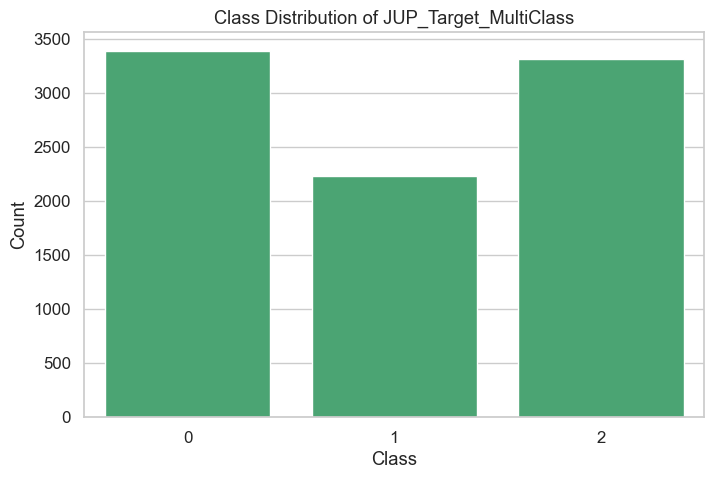

In [6]:
plt.figure(figsize=(8,5))
sns.barplot(x=y.value_counts().index, y=y.value_counts().values, color="mediumseagreen")
plt.title("Class Distribution of JUP_Target_MultiClass")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [7]:
X = df.drop(columns=[target_col]).copy()

In [8]:
for col in X.columns:
    if X[col].dtype == 'object':
        try:
            # datetime to timestamp
            X[col] = pd.to_datetime(X[col]).astype(int) / 10**9
        except:
            # categorical strings to numeric codes
            X[col] = X[col].astype('category').cat.codes


In [9]:
mi_scores = pd.Series(mutual_info_classif(X, y, discrete_features=False, random_state=42), index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
print("\nMutual Information scores:\n", mi_scores)


Mutual Information scores:
 FE_JUP_Volatility_20     0.019676
FE_JUP_Hourly_Range      0.018550
FE_JUP_Close_vs_SMA10    0.016501
JUP_High                 0.014930
JUP_Low                  0.012662
FE_JUP_Volatility_5      0.010640
FE_JUP_SMA_10            0.009814
FE_JUP_Return_Log        0.009457
FE_JUP_OC_Delta          0.008975
FE_DayOfMonth            0.006580
FE_DayOfWeek             0.005542
FE_JUP_RSI_14            0.004371
JUP_Close                0.004115
FE_JUP_Volume_Lag1       0.001720
JUP_Open                 0.000000
FE_JUP_SMA_50            0.000000
JUP_Volume               0.000000
FE_JUP_Close_Lag1        0.000000
FE_Hour                  0.000000
dtype: float64


In [10]:
threshold = 0.002
selected_features = mi_scores[mi_scores > threshold].index.tolist()
print(f"\nSelected features (MI > {threshold}):\n", selected_features)


Selected features (MI > 0.002):
 ['FE_JUP_Volatility_20', 'FE_JUP_Hourly_Range', 'FE_JUP_Close_vs_SMA10', 'JUP_High', 'JUP_Low', 'FE_JUP_Volatility_5', 'FE_JUP_SMA_10', 'FE_JUP_Return_Log', 'FE_JUP_OC_Delta', 'FE_DayOfMonth', 'FE_DayOfWeek', 'FE_JUP_RSI_14', 'JUP_Close']


In [11]:
X_selected = X[selected_features].copy()
print("\nPreview of selected features:\n", X_selected.head())


Preview of selected features:
                      FE_JUP_Volatility_20  FE_JUP_Hourly_Range  \
Datetime                                                         
2024-10-24 23:00:00              0.013145               0.0209   
2024-10-25 00:00:00              0.013282               0.0171   
2024-10-25 01:00:00              0.014262               0.0331   
2024-10-25 02:00:00              0.014264               0.0118   
2024-10-25 03:00:00              0.014411               0.0186   

                     FE_JUP_Close_vs_SMA10  JUP_High  JUP_Low  \
Datetime                                                        
2024-10-24 23:00:00               0.032630    1.0825   1.0616   
2024-10-25 00:00:00               0.018393    1.0696   1.0525   
2024-10-25 01:00:00              -0.009928    1.0590   1.0259   
2024-10-25 02:00:00              -0.014544    1.0352   1.0234   
2024-10-25 03:00:00              -0.025515    1.0286   1.0100   

                     FE_JUP_Volatility_5  FE_JUP_

In [12]:
skewness = X_selected.skew()
high_skew = skewness[skewness.abs() > 1].index.tolist()
print("Highly skewed features:\n", high_skew)

qt = QuantileTransformer(output_distribution='normal', random_state=42)
for feature in high_skew:
    X_selected[feature] = qt.fit_transform(X_selected[[feature]])
    print(f"Transformed {feature} with QuantileTransformer")


Highly skewed features:
 ['FE_JUP_Volatility_20', 'FE_JUP_Hourly_Range', 'FE_JUP_Volatility_5', 'FE_JUP_Return_Log', 'FE_JUP_OC_Delta']
Transformed FE_JUP_Volatility_20 with QuantileTransformer
Transformed FE_JUP_Hourly_Range with QuantileTransformer
Transformed FE_JUP_Volatility_5 with QuantileTransformer
Transformed FE_JUP_Return_Log with QuantileTransformer
Transformed FE_JUP_OC_Delta with QuantileTransformer


In [13]:
new_skewness = X_selected[high_skew].skew()
print("\nSkewness after QuantileTransformer:\n", new_skewness)


Skewness after QuantileTransformer:
 FE_JUP_Volatility_20   -0.006422
FE_JUP_Hourly_Range    -0.012956
FE_JUP_Volatility_5    -0.000719
FE_JUP_Return_Log       0.000270
FE_JUP_OC_Delta        -0.002878
dtype: float64


In [14]:
save_dir = r"C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\4-oy\6-project\binance.com\data\final_training_data"
os.makedirs(save_dir, exist_ok=True)

X_selected.to_csv(os.path.join(save_dir, "X_selected_transformed.csv"), index=False)
y.to_csv(os.path.join(save_dir, "y_original.csv"), index=False)
print("Saved X_selected_transformed.csv and y_original.csv")

Saved X_selected_transformed.csv and y_original.csv


In [15]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
import os

save_dir = r"C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\4-oy\6-project\binance.com\data\final_training_data"

smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_selected, y)  

print("Class distribution after SMOTE:\n", Counter(y_balanced))

# Save balanced X and y
pd.DataFrame(X_balanced, columns=X_selected.columns).to_csv(os.path.join(save_dir, "X_balanced.csv"), index=False)
pd.DataFrame(y_balanced, columns=[y.name]).to_csv(os.path.join(save_dir, "y_balanced.csv"), index=False)
print("Saved X_balanced.csv and y_balanced.csv")


Class distribution after SMOTE:
 Counter({0: 3395, 2: 3395, 1: 3395})
Saved X_balanced.csv and y_balanced.csv
